# Lab exercise 3.04.2 - Rainfall

The model solution for this exercise contains some errors, so this file is an attempt to explain the correct solution in more detail.

### Problem statement

The amount of rainfall on a certain island over the past 30 years has followed a normal distribution with mean 82.3 cm per year, and standard deviation 15.3. Scientists suspect that global warming has now increased the mean. A hypothesis test, of 5% level of significance is to be carried out to test the suspicion. The average rainfall on the island over the next 5 years will be used for the test.

1. Find the region of rejection for the test
2. What is the probability of making a Type I error?
3. Find the probability of making a Type II error if the mean rainfall on the island has actually increased to 105 cm per year.


In [1]:
# Package imports for data science
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

### 1. Region of rejection for the test

Since the sample size $n = 5$ is smaller than 30, the Central Limit Theorem does *not* apply. However, because the variable "amount of rainfall" is normally distributed, we can use the t-distribution to solve this problem.

The null hypothesis is that the mean rainfall is still 82.3 cm per year, the alternative hypothesis that the rainfall has increased:

- $H_0: \mu = 82.3$
- $H_1: \mu > 82.3$

Under the null hypothesis, the distribution of the sample mean $\bar{x}$ will follow the t-distribution with $n - 1 = 4$ degrees of freedom, as illustrated in the following plot:

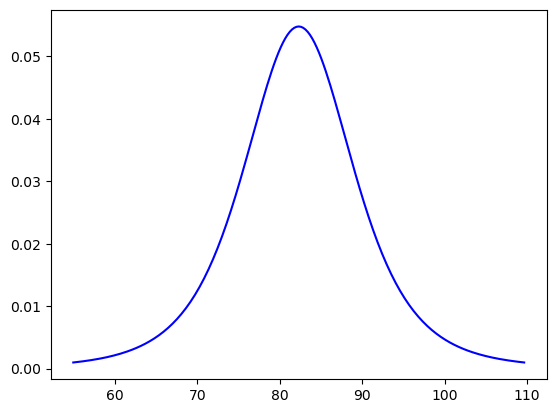

In [ ]:
mu = 82.3     # population mean (under null hypothesis)
sigma = 15.3  # population standard deviation
n = 5         # sample size
standard_error = sigma / np.sqrt(n)

xvals = np.linspace(mu - 4 * standard_error, mu + 4 * standard_error, num=201)
plt.plot(xvals, stats.t.pdf(xvals, loc=mu, scale=standard_error, df=n-1), color='blue');

If we perform the test at significance level $\alpha = 0.05$, the critical value $g$ is given by:

In [9]:
alpha = 0.05
g = stats.t.isf(alpha, loc=mu, scale=standard_error, df=n-1)
print("Critical value: g ≃ %.4f" % g)

Critical value: g ≃ 96.8869


So, in order to reject the null hypothesis, we need to observe a sample mean of at least $\overline{x} > 96.8869$. Graphically:

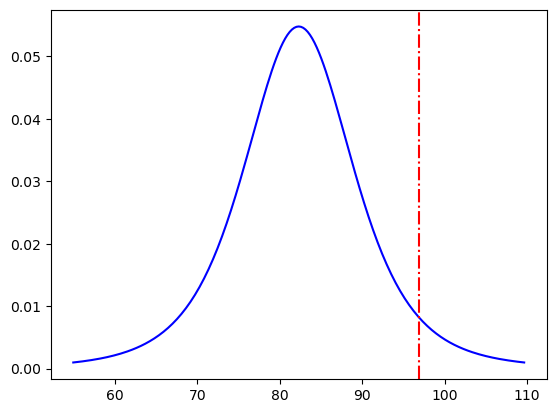

In [19]:
plt.plot(xvals, stats.t.pdf(xvals, loc=mu, scale=standard_error, df=n-1), color='blue');
plt.axvline(g, color='red', ls='-.');

### 2. Probability of making a Type I error

The probability of making a Type I error is the probability of rejecting the null hypothesis when it is actually true. This value is chosen by the researcher, and is called the significance level of the test, $\alpha$. In this case, we have chosen a significance level of $\alpha = 0.05$.

### 3. Probability of making a Type II error

Now, if the actual average rainfall has increased to 105 cm, the *actual* probability distribution of the sample mean is centred around 105 instead of 82.3. In the plot below, this is represented by the green curve:

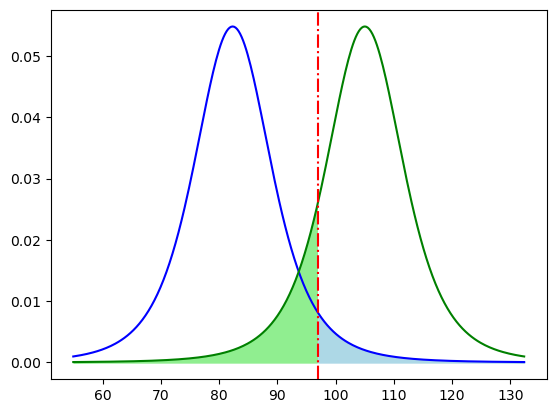

In [49]:
xvals = np.linspace(mu - 4 * standard_error, 105 + 4 * standard_error, num=301)

# probability distribution under the original null hypothesis:
t_dist_mu  = stats.t.pdf(xvals, loc=mu, scale=standard_error, df=n-1)
plt.plot(xvals, t_dist_mu, color='blue');

# probability distribution when µ = 105:
t_dist_105 = stats.t.pdf(xvals, loc=105, scale=standard_error, df=n-1)
plt.plot(xvals, t_dist_105, color='green');

# Fill the area for the probability of Type I error in light blue
plt.fill_between(xvals, 0, t_dist_mu, where=xvals > g, color='lightblue');

# Fill the area for the probability of Type II error in light green
plt.fill_between(xvals, 0, t_dist_105, where=xvals < g, color='lightgreen');

# Plot the critical value
plt.axvline(g, color='red', ls='-.');

When we perform a hypothesis test under the null hypothesis $\mu = 82.3$, we will (correctly) *reject* the null hypothesis if the sample mean $\overline{x} > g = 96.8869$, but we will (erroneously) *not* reject it if the sample mean $\overline{x} < g$. That's the definition of a Type II error. The probability of this occuring corresponds with the *left tail probability* of $g$ under the green probability curve (filled in light green in the plot above):

In [50]:
type_ii_p = stats.t.cdf(g, loc=105, scale=standard_error, df=n-1)
print("Probability of Type II error if µ = 105: β = %.4f %% " % (type_ii_p*100))

Probability of Type II error if µ = 105: β = 15.0678 % 


### Conclusion

Summarized, the correct results for the questions are:

1. The region of rejection is $\overline{x} \in ]96.8869, +\infty[$
2. The probability of a Type I error (when the original null hypothesis is still correct) is always given by $\alpha$, so for this case 5%.
3. The probability of a Type II error (when $\mu = 105$) $\beta \approx 0.1507$ or 15.0678 %

### Discussion

In the notebook on hypothesis testing (`3_03_hypothesis_testing.ipynb`), we stated that calculating $\beta$ is not trivial. In fact, it is practically impossible, because the calculation of $\beta$ depends on the actual population mean, which is unknown.

We also stated that if you choose a lower $\alpha$, you will increase the chance of making a Type II error. You can understand this intuitively by looking at the plot above. When you choose a lower $\alpha$, the critical value $g$ will move to the right. The "blue area" (probability of Type I) decreases, but the "green area" (probability of Type II) increases. This is a trade-off that you need to make when designing your hypothesis test.

For example, if you choose $\alpha = 0.01$, the critical value $g$ becomes:

In [53]:
alpha = 0.01
g = stats.t.isf(alpha, loc=mu, scale=standard_error, df=n-1)
print("Critical value: g ≃ %.4f" % g)

Critical value: g ≃ 107.9380


... and the corresponding probability of making a Type II error $\beta$ becomes a staggering 65%!

In [54]:
type_ii_p = stats.t.cdf(g, loc=105, scale=standard_error, df=n-1)
print("Probability of Type II error if µ = 105: β = %.4f %% " % (type_ii_p*100))

Probability of Type II error if µ = 105: β = 65.5119 % 


The plot of this situation is shown below. The code block is hidden, but it is identical to code for the previous plot:

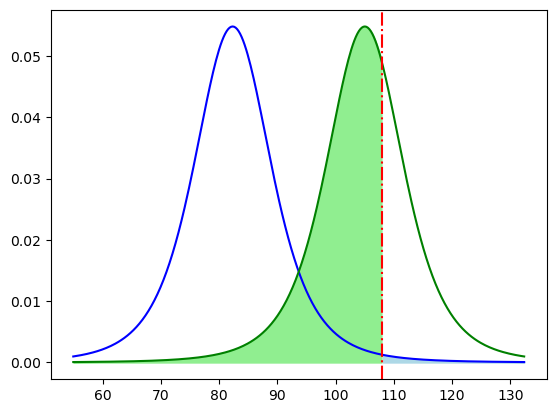

In [56]:

xvals = np.linspace(mu - 4 * standard_error, 105 + 4 * standard_error, num=301)

# probability distribution under the original null hypothesis:
t_dist_mu  = stats.t.pdf(xvals, loc=mu, scale=standard_error, df=n-1)
plt.plot(xvals, t_dist_mu, color='blue');

# probability distribution when µ = 105:
t_dist_105 = stats.t.pdf(xvals, loc=105, scale=standard_error, df=n-1)
plt.plot(xvals, t_dist_105, color='green');

# Fill the area for the probability of Type I error in light blue
plt.fill_between(xvals, 0, t_dist_mu, where=xvals > g, color='lightblue');

# Fill the area for the probability of Type II error in light green
plt.fill_between(xvals, 0, t_dist_105, where=xvals < g, color='lightgreen');

# Plot the critical value
plt.axvline(g, color='red', ls='-.');